In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
Brain_final_df = pd.read_csv("Brain variables and proteomics data.csv")

C:\Users\Romina\AppData\Local\Temp\ipykernel_11096\1591644362.py:1: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,

In [5]:
proteomics_file = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\proteomics_preprocessed.csv"
proteomics_df = pd.read_csv(proteomics_file)

C:\Users\Romina\AppData\Local\Temp\ipykernel_11096\889670466.py:2: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,

In [6]:
phenotype = r"c:\Users\Romina\Downloads\ukb674360 (1).txt"

In [7]:
columns_to_include = [
    "eid", "31-0.0", "34-0.0", 
    "30300-2.0", "30600-0.0", "30600-1.0",
    "30660-1.0", "30670-0.0", "30670-1.0",
    "30680-0.0", "30680-1.0",
    "30690-1.0", "30700-0.0", "30700-1.0",
    "30710-1.0", "30720-0.0", "30720-1.0",
    "30870-1.0", "30880-0.0", "30880-1.0",
    "30800-1.0", "30810-0.0", "30810-1.0",
    "30850-1.0", "30860-0.0", "30860-1.0"

]


In [8]:
Kidney_pheno = pd.read_csv( phenotype, usecols=columns_to_include, sep="\t", on_bad_lines='skip')

In [9]:
Kidney_pheno

eid  31-0.0  34-0.0  30300-2.0  30600-0.0  30600-1.0  30660-1.0  \
NaN 1000018  1.0    1954  1045.0      46.79        NaN       69.5       5.61   
    1000024  1.0    1940  1051.0      45.72        NaN       83.7       8.33   
    1000031  1.0    1948  1058.0        NaN        NaN       59.3       8.17   
    1000043  1.0    1945  2817.0      47.62        NaN       80.7       6.25   
    1000059  1.0    1952  1045.0      44.49        NaN      119.8       4.51   
...          ...     ...     ...        ...        ...        ...        ...   
    4946719  1.0    1942  2815.0        NaN        NaN        NaN        NaN   
    4946727  1.0    1943   156.0      47.29        NaN       61.2       5.46   
    4946736  1.0    1949  2816.0      41.92        NaN       75.4       6.85   
    4946742  1.0    1958  2817.0      43.31        NaN      116.7       4.48   
    4946758  1.0    1957  2815.0        NaN        NaN        NaN        NaN   

             30670-0.0  30670-1.0  30680-0.0  ...  30720-1.0  30800-1.0  \
NaN 1000018        NaN      2.537        NaN  ...       20.4      1.284   
    1000024        NaN      2.499        NaN  ...       16.8      1.183   
    1000031        NaN        NaN        NaN  ...       30.8        NaN   
    1000043        NaN      2.413        NaN  ...       23.4      1.264   
    1000059        NaN      2.382        NaN  ...       42.1      1.138   
...                ...        ...        ...  ...        ...        ...   
    4946719        NaN        NaN        NaN  ...        NaN        NaN   
    4946727        NaN      2.468        NaN  ...       56.4      1.237   
    4946736        NaN      2.172        NaN  ...       34.0      1.084   
    4946742        NaN      2.388        NaN  ...       27.6      1.301   
    4946758        NaN        NaN        NaN  ...        NaN        NaN   

             30810-0.0  30810-1.0  30850-1.0  30860-0.0  30860-1.0  30870-1.0  \
NaN 1000018        NaN        NaN      80.84        NaN      0.642      230.7   
    1000024        NaN        NaN      71.67        NaN      1.225      233.8   
    1000031        NaN        NaN        NaN        NaN      1.402      385.4   
    1000043        NaN        NaN      73.38        NaN      0.880      442.2   
    1000059        NaN        NaN      67.21        NaN      2.173      273.0   
...                ...        ...        ...        ...        ...        ...   
    4946719        NaN        NaN        NaN        NaN        NaN        NaN   
    4946727        NaN        NaN      74.33        NaN      0.862      333.6   
    4946736        NaN        NaN      67.43        NaN      1.713      277.2   
    4946742        NaN        NaN      81.83        NaN      2.259      350.4   
    4946758        NaN        NaN        NaN        NaN        NaN        NaN   

             30880-0.0  30880-1.0  
NaN 1000018        NaN       96.0  
    1000024        NaN       78.9  
    1000031        NaN       74.5  
    1000043        NaN       46.0  
    1000059        NaN       34.6  
...                ...        ...  
    4946719        NaN        NaN  
    4946727        NaN       85.0  
    4946736        NaN       37.5  
    4946742        NaN       31.8  
    4946758        NaN        NaN  

[394668 rows x 26 columns]

In [ ]:
if isinstance(Kidney_pheno.index, pd.MultiIndex):
    Kidney_pheno = Kidney_pheno.reset_index()

In [11]:
Kidney_pheno.drop(columns=["level_0"], inplace=True)

In [12]:
Kidney_pheno.rename(columns={"level_1": "temp_eid"}, inplace=True)

In [13]:
old_cols = Kidney_pheno.columns.tolist()
num_cols = len(old_cols)

In [14]:
new_cols = [None] * num_cols

In [15]:
new_cols[0] = "eid"

In [16]:
for i in range(1, num_cols - 1):
    new_cols[i] = old_cols[i + 1]

In [17]:
new_cols[-1] = "unknown"

In [18]:
Kidney_pheno.columns = new_cols

In [35]:
columns_to_drop = ["unknown", "31-0.0", "34-0.0", "30300-2.0", "30660-1.0", "30710-1.0", "30690-1.0", "30870-1.0", "30800-1.0", "30850-1.0"]
Kidney_pheno.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [36]:
Kidney_pheno

,eid,30600-0.0,30600-1.0,30670-0.0,30670-1.0,30680-0.0,30680-1.0,30700-0.0,30700-1.0,30720-0.0,30720-1.0,30810-0.0,30810-1.0,30860-0.0,30860-1.0,30880-0.0,30880-1.0
0,1000018,46.79,NaN,5.61,NaN,2.537,NaN,71.2,NaN,0.874,NaN,1.284,NaN,80.84,NaN,230.7,NaN
1,1000024,45.72,NaN,8.33,NaN,2.499,NaN,89.3,NaN,1.041,NaN,1.183,NaN,71.67,NaN,233.8,NaN
2,1000031,NaN,NaN,8.17,NaN,NaN,NaN,87.4,NaN,1.092,NaN,NaN,NaN,NaN,NaN,385.4,NaN
3,1000043,47.62,NaN,6.25,NaN,2.413,NaN,87.9,NaN,0.909,NaN,1.264,NaN,73.38,NaN,442.2,NaN
4,1000059,44.49,NaN,4.51,NaN,2.382,NaN,70.6,NaN,0.819,NaN,1.138,NaN,67.21,NaN,273.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,4946719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394664,4946727,47.29,NaN,5.46,NaN,2.468,NaN,83.2,NaN,0.870,NaN,1.237,NaN,74.33,NaN,333.6,NaN
394665,4946736,41.92,NaN,6.85,NaN,2.172,NaN,67.8,NaN,0.792,NaN,1.084,NaN,67.43,NaN,277.2,NaN
394666,4946742,43.31,NaN,4.48,NaN,2.388,NaN,87.5,NaN,0.870,NaN,1.301,NaN,81.83,NaN,350.4,NaN


In [37]:
Kidney_pheno.to_csv("correct but original Kidney pheno.csv", index=False)

In [38]:
# keep only shared participants
shared_eids = set(proteomics_df['eid']).intersection(set(Kidney_pheno['eid']))
print(f"shared eids: {len(shared_eids)}")

shared eids: 41305


In [39]:
shared_eids = set(proteomics_df['eid']).intersection(set(Kidney_pheno['eid']))
proteomics_shared = proteomics_df[proteomics_df['eid'].isin(shared_eids)].copy()
Kidney_pheno_shared = Kidney_pheno[Kidney_pheno['eid'].isin(shared_eids)].copy()

In [40]:
Kidney_merged_df = pd.merge(proteomics_shared, Kidney_pheno_shared, on="eid", how="inner")

In [41]:
Kidney_merged_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,30700-0.0,30700-1.0,30720-0.0,30720-1.0,30810-0.0,30810-1.0,30860-0.0,30860-1.0,30880-0.0,30880-1.0
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,89.3,NaN,1.041,NaN,1.183,NaN,71.67,NaN,233.8,NaN
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,87.9,NaN,0.909,NaN,1.264,NaN,73.38,NaN,442.2,NaN
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,57.5,NaN,0.752,NaN,NaN,NaN,NaN,NaN,217.0,NaN
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,101.0,NaN,1.211,NaN,NaN,NaN,NaN,NaN,380.2,NaN
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,108.0,NaN,0.907,NaN,1.228,NaN,80.87,NaN,374.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,63.6,NaN,1.264,NaN,1.296,NaN,65.46,NaN,221.0,NaN
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,89.7,NaN,0.915,NaN,1.183,NaN,68.39,NaN,330.9,NaN
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,78.2,NaN,1.642,NaN,1.612,NaN,72.70,NaN,415.7,NaN
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,70.0,NaN,0.851,NaN,0.756,NaN,74.30,NaN,243.5,NaN


In [42]:
Kidney_cols_of_interest = ["30670-0.0"] 
features_df = Kidney_pheno_shared[Kidney_pheno_shared[Kidney_cols_of_interest].notna().any(axis=1)].copy()

In [43]:
start_col = "30600-0.0"
start_idx = list(features_df.columns).index(start_col)
features_cols_to_preprocess = features_df.columns[start_idx:]
features_cols_to_preprocess = features_cols_to_preprocess.drop("eid", errors="ignore")

In [44]:
# Missing value filter (≤50% missing)
missing_ratio = features_df[features_cols_to_preprocess].isna().mean()
columns_to_keep = missing_ratio[missing_ratio <= 0.5].index.tolist()

In [45]:
# Keep eid + valid imaging columns
columns_to_keep = ['eid'] + columns_to_keep
features_df = features_df[columns_to_keep]

In [46]:
numeric_cols = features_df.select_dtypes(include=[np.number]).columns.difference(['eid'])
z_scores = features_df[numeric_cols].apply(zscore)
features_df[numeric_cols] = features_df[numeric_cols].mask((z_scores > 3) | (z_scores < -3))

In [47]:
features_df[numeric_cols] = features_df[numeric_cols].fillna(features_df[numeric_cols].mean())

In [48]:
features_df

,eid,30600-0.0,30670-0.0,30680-0.0,30700-0.0,30720-0.0,30810-0.0,30860-0.0,30880-0.0
1,1000024,45.720000,8.33,2.499000,89.3,1.041,1.183000,71.670000,233.8
3,1000043,47.620000,6.25,2.413000,87.9,0.909,1.264000,73.380000,442.2
14,1000156,45.135452,3.96,2.378299,57.5,0.752,1.159981,72.524312,217.0
20,1000217,45.135452,8.10,2.378299,101.0,1.211,1.159981,72.524312,380.2
29,1000309,48.110000,5.64,2.445000,108.0,0.907,1.228000,80.870000,374.7
...,...,...,...,...,...,...,...,...,...
394635,4946434,41.740000,4.72,2.314000,63.6,1.264,1.296000,65.460000,221.0
394641,4946496,43.130000,6.50,2.242000,89.7,0.915,1.183000,68.390000,330.9
394648,4946567,43.450000,6.75,2.440000,78.2,1.642,1.612000,72.700000,415.7
394656,4946648,47.080000,5.81,2.430000,70.0,0.851,0.756000,74.300000,243.5


In [49]:
rename_dict = { 
    "30600-0.0": "Albumin", "30670-0.0": "Urea", "30680-0.0": "Calcium", "30700-0.0": "Creatinine", 
    "30720-0.0": "Cystatin C", "30810-0.0": "Phosphate", "30860-0.0": "Total Protein", "30880-0.0": "Uric Acid"}

features_df.rename(columns=rename_dict, inplace=True)

In [50]:
features_df

,eid,Albumin,Urea,Calcium,Creatinine,Cystatin C,Phosphate,Total Protein,Uric Acid
1,1000024,45.720000,8.33,2.499000,89.3,1.041,1.183000,71.670000,233.8
3,1000043,47.620000,6.25,2.413000,87.9,0.909,1.264000,73.380000,442.2
14,1000156,45.135452,3.96,2.378299,57.5,0.752,1.159981,72.524312,217.0
20,1000217,45.135452,8.10,2.378299,101.0,1.211,1.159981,72.524312,380.2
29,1000309,48.110000,5.64,2.445000,108.0,0.907,1.228000,80.870000,374.7
...,...,...,...,...,...,...,...,...,...
394635,4946434,41.740000,4.72,2.314000,63.6,1.264,1.296000,65.460000,221.0
394641,4946496,43.130000,6.50,2.242000,89.7,0.915,1.183000,68.390000,330.9
394648,4946567,43.450000,6.75,2.440000,78.2,1.642,1.612000,72.700000,415.7
394656,4946648,47.080000,5.81,2.430000,70.0,0.851,0.756000,74.300000,243.5


In [51]:
Kidney_final_df = pd.merge(Brain_final_df, features_df, on="eid", how="left")

In [52]:
Kidney_final_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,Volume_Insula_Right_Hemisphere,imaging,Albumin,Urea,Calcium,Creatinine,Cystatin C,Phosphate,Total Protein,Uric Acid
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,NaN,0,45.720000,8.33,2.499000,89.3,1.041,1.183000,71.670000,233.8
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,6353.0,1,47.620000,6.25,2.413000,87.9,0.909,1.264000,73.380000,442.2
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,NaN,0,45.135452,3.96,2.378299,57.5,0.752,1.159981,72.524312,217.0
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,NaN,0,45.135452,8.10,2.378299,101.0,1.211,1.159981,72.524312,380.2
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,48.110000,5.64,2.445000,108.0,0.907,1.228000,80.870000,374.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,NaN,0,41.740000,4.72,2.314000,63.6,1.264,1.296000,65.460000,221.0
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,NaN,0,43.130000,6.50,2.242000,89.7,0.915,1.183000,68.390000,330.9
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,NaN,0,43.450000,6.75,2.440000,78.2,1.642,1.612000,72.700000,415.7
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,47.080000,5.81,2.430000,70.0,0.851,0.756000,74.300000,243.5


In [53]:
Kidney_final_df["Kidney features"] = Kidney_final_df["Urea"].notna().astype(int)

In [55]:
Kidney_final_df.to_csv("Kidney and Brain variables with proteomics data.csv", index=False)

In [122]:
Kidney_pheno = Kidney_final_df[Kidney_final_df["Kidney features"] == 1].copy()
print("Number of participants with Kidney features", Kidney_pheno.shape[0])

Number of participants with Kidney features 39265


In [123]:
# Protein columns
protein_cols = Kidney_pheno.loc[:, "A1BG": "ZPR1"].columns
X_Kidney_all = Kidney_pheno[protein_cols]

In [124]:
start_col = "Albumin"
end_col = "Uric Acid"
Kidney_all_outcome_cols = Kidney_pheno.loc[:, start_col:end_col].columns

In [125]:
Y_Kidney_all = Kidney_pheno[Kidney_all_outcome_cols]

In [126]:
print("X shape:", X_Kidney_all.shape)
print("Y shape:", Y_Kidney_all.shape)

X shape: (39265, 2923)
Y shape: (39265, 8)


In [127]:
X_Kidney_all_clean = X_Kidney_all.dropna()
Y_Kidney_all_clean = Y_Kidney_all.loc[X_Kidney_all_clean.index].dropna()

X_Kidney_all_clean = X_Kidney_all_clean.loc[Y_Kidney_all_clean.index]
print("Clean X shape:", X_Kidney_all_clean.shape)
print("Clean Y shape:", Y_Kidney_all_clean.shape)

Clean X shape: (39265, 2923)
Clean Y shape: (39265, 8)


In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_Kidney_all_clean, Y_Kidney_all_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)

PLS Regression Test R² Score: 0.12644876443989775


In [129]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_Kidney_all_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(10)

print(protein_weights.loc[top_proteins.index])

CST3        0.081373
IGFBP6      0.078457
CD59        0.078374
RELT        0.077588
HSPG2       0.073277
IGFBP4      0.072238
COL6A3      0.072154
CD38        0.070142
NPDC1       0.069304
TNFRSF1A    0.068983
Name: PLS_Component_1_Weight, dtype: float64


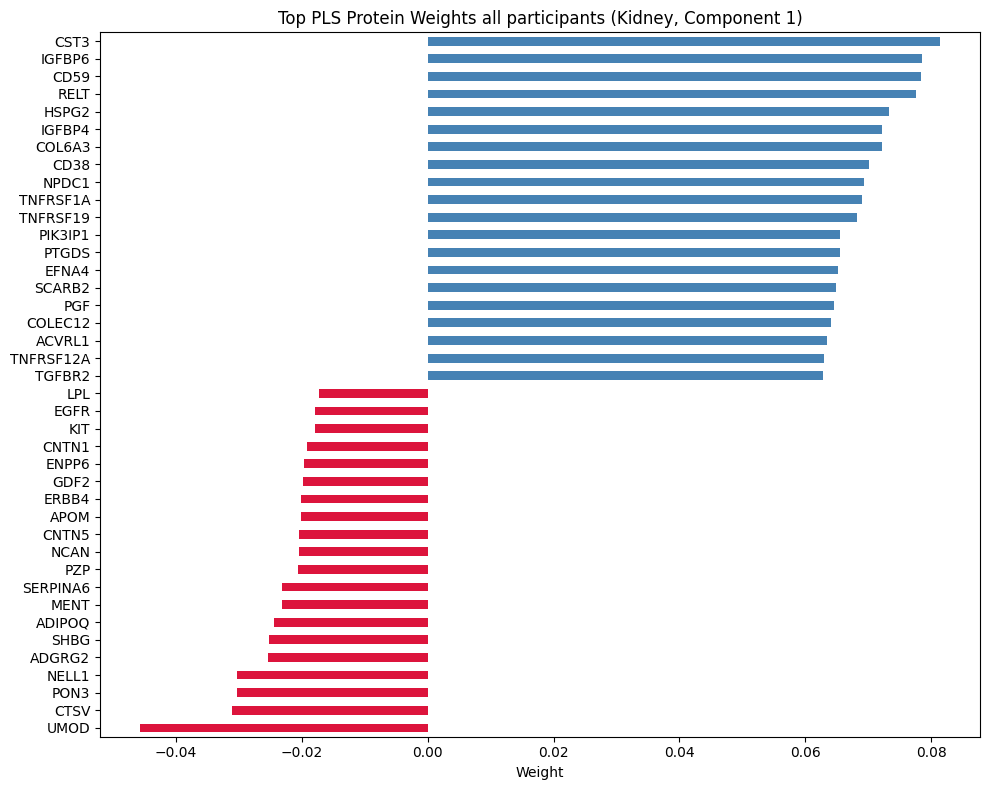

In [131]:
sorted_weights = protein_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights all participants (Kidney, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [132]:
# Extract weights
pheno_weights = pd.Series(
    pls_model.y_weights_.flatten(),
    index=Y_Kidney_all_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_pheno = pheno_weights.abs().sort_values(ascending=False).head(20)

# Display top 20 proteins (with their signed weights)
print(pheno_weights.loc[top_pheno.index])

Cystatin C       0.052888
Creatinine       0.032467
Uric Acid        0.031219
Urea             0.018076
Albumin         -0.010561
Total Protein    0.005508
Calcium          0.003833
Phosphate       -0.000393
Name: PLS_Component_1_Weight, dtype: float64


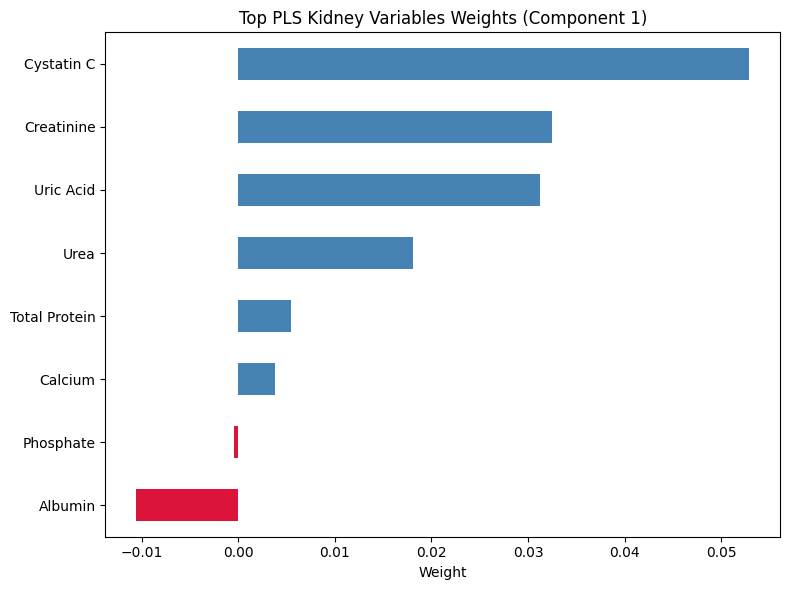

In [133]:
sorted_weights = pheno_weights.sort_values()
#top_n = 12
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Kidney Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [68]:
# 1. Standardize protein data
X_standardized = (X_Kidney_all_clean - X_Kidney_all_clean.mean()) / X_Kidney_all_clean.std()
# 2. Run PCA and extract the first principal component
pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_standardized)
# 3. Regress out PC1 from each protein
X_residualized = pd.DataFrame(index=X_standardized.index, columns=X_standardized.columns)
for col in X_standardized.columns:
    model = LinearRegression()
    model.fit(pc1, X_standardized[col])
    predicted = model.predict(pc1)
    residual = X_standardized[col] - predicted
    X_residualized[col] = residual

# 4. the residualized protein data
X_residualized = X_residualized.astype(float)
print("Original X shape:", X_Kidney_all_clean.shape)
print("Residualized X shape:", X_residualized.shape)


Original X shape: (39265, 2923)
Residualized X shape: (39265, 2923)


In [70]:
# 1. Split the residualized data
X_train_resid, X_test_resid, Y_train_resid, Y_test_resid = train_test_split(
    X_residualized, Y_Kidney_all_clean, test_size=0.2, random_state=42
)

In [71]:
# 2. Define and fit the PLS model
pls_model_resid = PLSRegression(n_components=1)
pls_model_resid.fit(X_train_resid, Y_train_resid)

PLSRegression(n_components=1)

In [72]:
# 3. Predict on the test set
Y_pred_resid = pls_model_resid.predict(X_test_resid)

In [73]:
# 4. Evaluate performance
r2_resid = r2_score(Y_test_resid, Y_pred_resid)
r2_resid

0.13474070295765112

In [74]:
# 5. Extract top X weights (proteins)
protein_weights_resid = pd.Series(
    pls_model_resid.x_weights_.flatten(),
    index=X_residualized.columns,
    name="PLS_Component_1_Weight"
)
top_proteins_resid = protein_weights_resid.abs().sort_values(ascending=False).head(10)
top_protein_weights = protein_weights_resid.loc[top_proteins_resid.index]
top_protein_weights

CST3        0.078840
IGFBP6      0.077059
CD59        0.076087
RELT        0.075083
HSPG2       0.070990
IGFBP4      0.070375
COL6A3      0.069875
TNFRSF1A    0.067693
CD38        0.067236
TNFRSF19    0.066860
Name: PLS_Component_1_Weight, dtype: float64

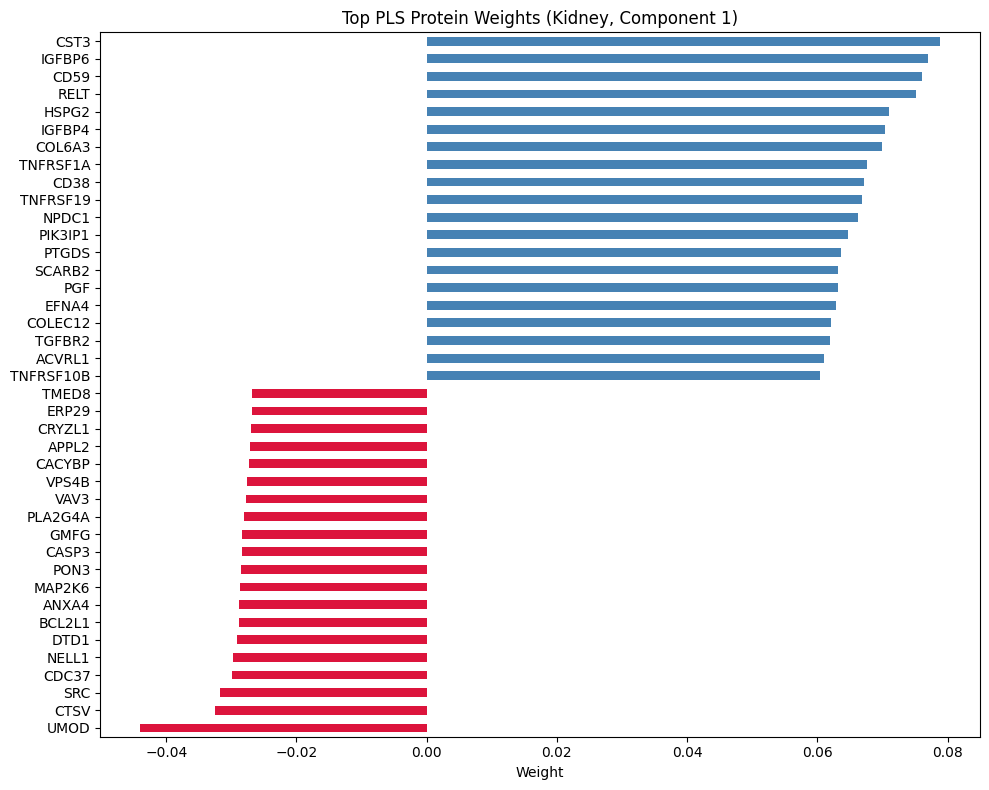

In [78]:
sorted_weights = protein_weights_resid.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Kidney, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [79]:
# 6. Extract top Y weights (phenotypes)
pheno_weights_resid = pd.Series(
    pls_model_resid.y_weights_.flatten(),
    index=Y_Kidney_all_clean.columns,
    name="PLS_Component_1_Weight"
)
top_pheno_resid = pheno_weights_resid.abs().sort_values(ascending=False).head(20)
top_pheno_weights = pheno_weights_resid.loc[top_pheno_resid.index]

top_pheno_weights

Cystatin C       0.055961
Creatinine       0.036032
Uric Acid        0.031162
Urea             0.020442
Albumin         -0.013829
Phosphate       -0.002789
Total Protein   -0.001196
Calcium         -0.000750
Name: PLS_Component_1_Weight, dtype: float64

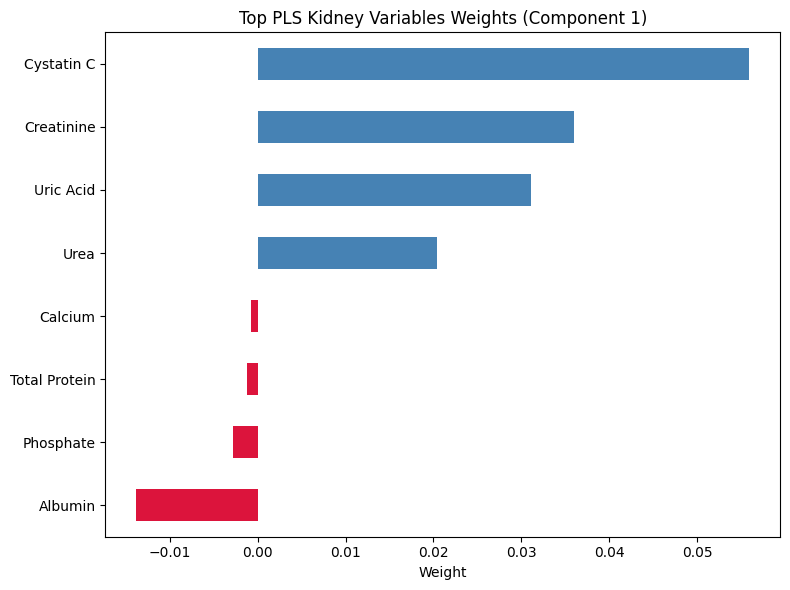

In [81]:
sorted_weights = pheno_weights_resid.sort_values()
# top_n = 20
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Kidney Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [82]:
pls_scores = pls_model.transform(X_Kidney_all_clean)

In [83]:
Kidney_pheno = Kidney_pheno.loc[X_Kidney_all_clean.index].copy() 
Kidney_pheno["PLS_Kidney_Component1"] = pls_scores[:, 0]

In [84]:
icd10_codes_mapping = {
    'alzheimer': ['G300', 'G309', 'G301', 'G310'],
    'dementia': ['F000', 'F001', 'F002', 'F009', 'F010', 'F011', 'F012', 'F013', 'F018', 'F019', 'F020', 'F021', 'F022', 'F023', 'F024', 'F028'],
    'stroke': ['I689', 'I635', 'I633', 'I638', 'I634'],
    'lbd': ['G318'],  
    'ms': ['G35'],  
    'als': ['G122'],  
    'parkinson': ['G20'],
    'delirium': ['F051'],   # Overlaps with dementia in older adults 
    'neurocognitive_disorder' : ['F067'], 
    'ns_degeneration' : ['G319', 'G328']
    
    }

In [85]:
main_icd10_columns = [col for col in Kidney_final_df.columns if col.startswith("Diagnoses_main_ICD10")]
secondary_icd10_columns = [col for col in Kidney_final_df.columns if col.startswith("Diagnoses_secondary_ICD10")]
icd10_columns = [col for col in Kidney_final_df.columns if col.startswith("Diagnoses_ICD10")]

In [86]:
all_diagnosis_columns = main_icd10_columns + secondary_icd10_columns + icd10_columns

In [87]:
def check_diagnosis(row, disease_codes, diagnosis_columns):
    for col in diagnosis_columns:
        if col in row:
            for code in disease_codes:
                if code in str(row[col]): 
                    return 1  
    return 0

In [88]:
# Binary columns for each diseases 
for disease, codes in icd10_codes_mapping.items():
    column_name = disease.lower() 
    Kidney_pheno[column_name] = Kidney_pheno.apply(lambda row: check_diagnosis(row, codes, all_diagnosis_columns), axis=1)

In [89]:
disease_columns = ['alzheimer', 'dementia', 'stroke', 'lbd', 'ms', 'als', 'parkinson', 'delirium', 'neurocognitive_disorder', 'ns_degeneration']
for disease in disease_columns:
    total = Kidney_pheno[disease].sum()
    print(f"participants diagnosed with {disease.capitalize()}: {total}")

participants diagnosed with Alzheimer: 519
participants diagnosed with Dementia: 718
participants diagnosed with Stroke: 376
participants diagnosed with Lbd: 106
participants diagnosed with Ms: 329
participants diagnosed with Als: 228
participants diagnosed with Parkinson: 699
participants diagnosed with Delirium: 172
participants diagnosed with Neurocognitive_disorder: 118
participants diagnosed with Ns_degeneration: 231


In [90]:
pls_columns = ["PLS_Kidney_Component1"]

diagnosis_columns = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

In [91]:
t_test_results = {}

for pls in pls_columns:
    for diagnosis in diagnosis_columns:
        if pls not in Kidney_pheno.columns or diagnosis not in Kidney_pheno.columns:
            print(f"Skipping {pls} or {diagnosis} because it's missing from dataset.")
            continue
        
        diagnosed_group = Kidney_pheno[Kidney_pheno[diagnosis] == 1][pls].dropna()
        non_diagnosed_group = Kidney_pheno[Kidney_pheno[diagnosis] == 0][pls].dropna()
        
        
        t_stat, p_value = ttest_ind(diagnosed_group, non_diagnosed_group, nan_policy='omit')
        
        t_test_results[(pls, diagnosis)] = {"t_stat": t_stat, "p_value": p_value}
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient='index')

t_test_results_df

t_stat       p_value
PLS_Kidney_Component1 alzheimer                7.089369  1.369939e-12
                      dementia                 9.415645  4.948314e-21
                      stroke                   9.606753  7.913141e-22
                      lbd                      3.564868  3.644707e-04
                      ms                      -1.965040  4.941659e-02
                      als                      3.341009  8.355226e-04
                      parkinson                4.765490  1.890686e-06
                      delirium                 5.238812  1.624463e-07
                      neurocognitive_disorder  6.464571  1.027762e-10
                      ns_degeneration          7.810677  5.828921e-15

C:\Users\Romina\AppData\Local\Temp\ipykernel_11096\3061348946.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Romina\AppData\Local\Temp\ipykernel_11096\3061348946.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Romina\AppData\Local\Temp\ipykernel_11096\3061348946.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Romina\AppData\Local\Temp\ipykernel_11096\3061348946.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

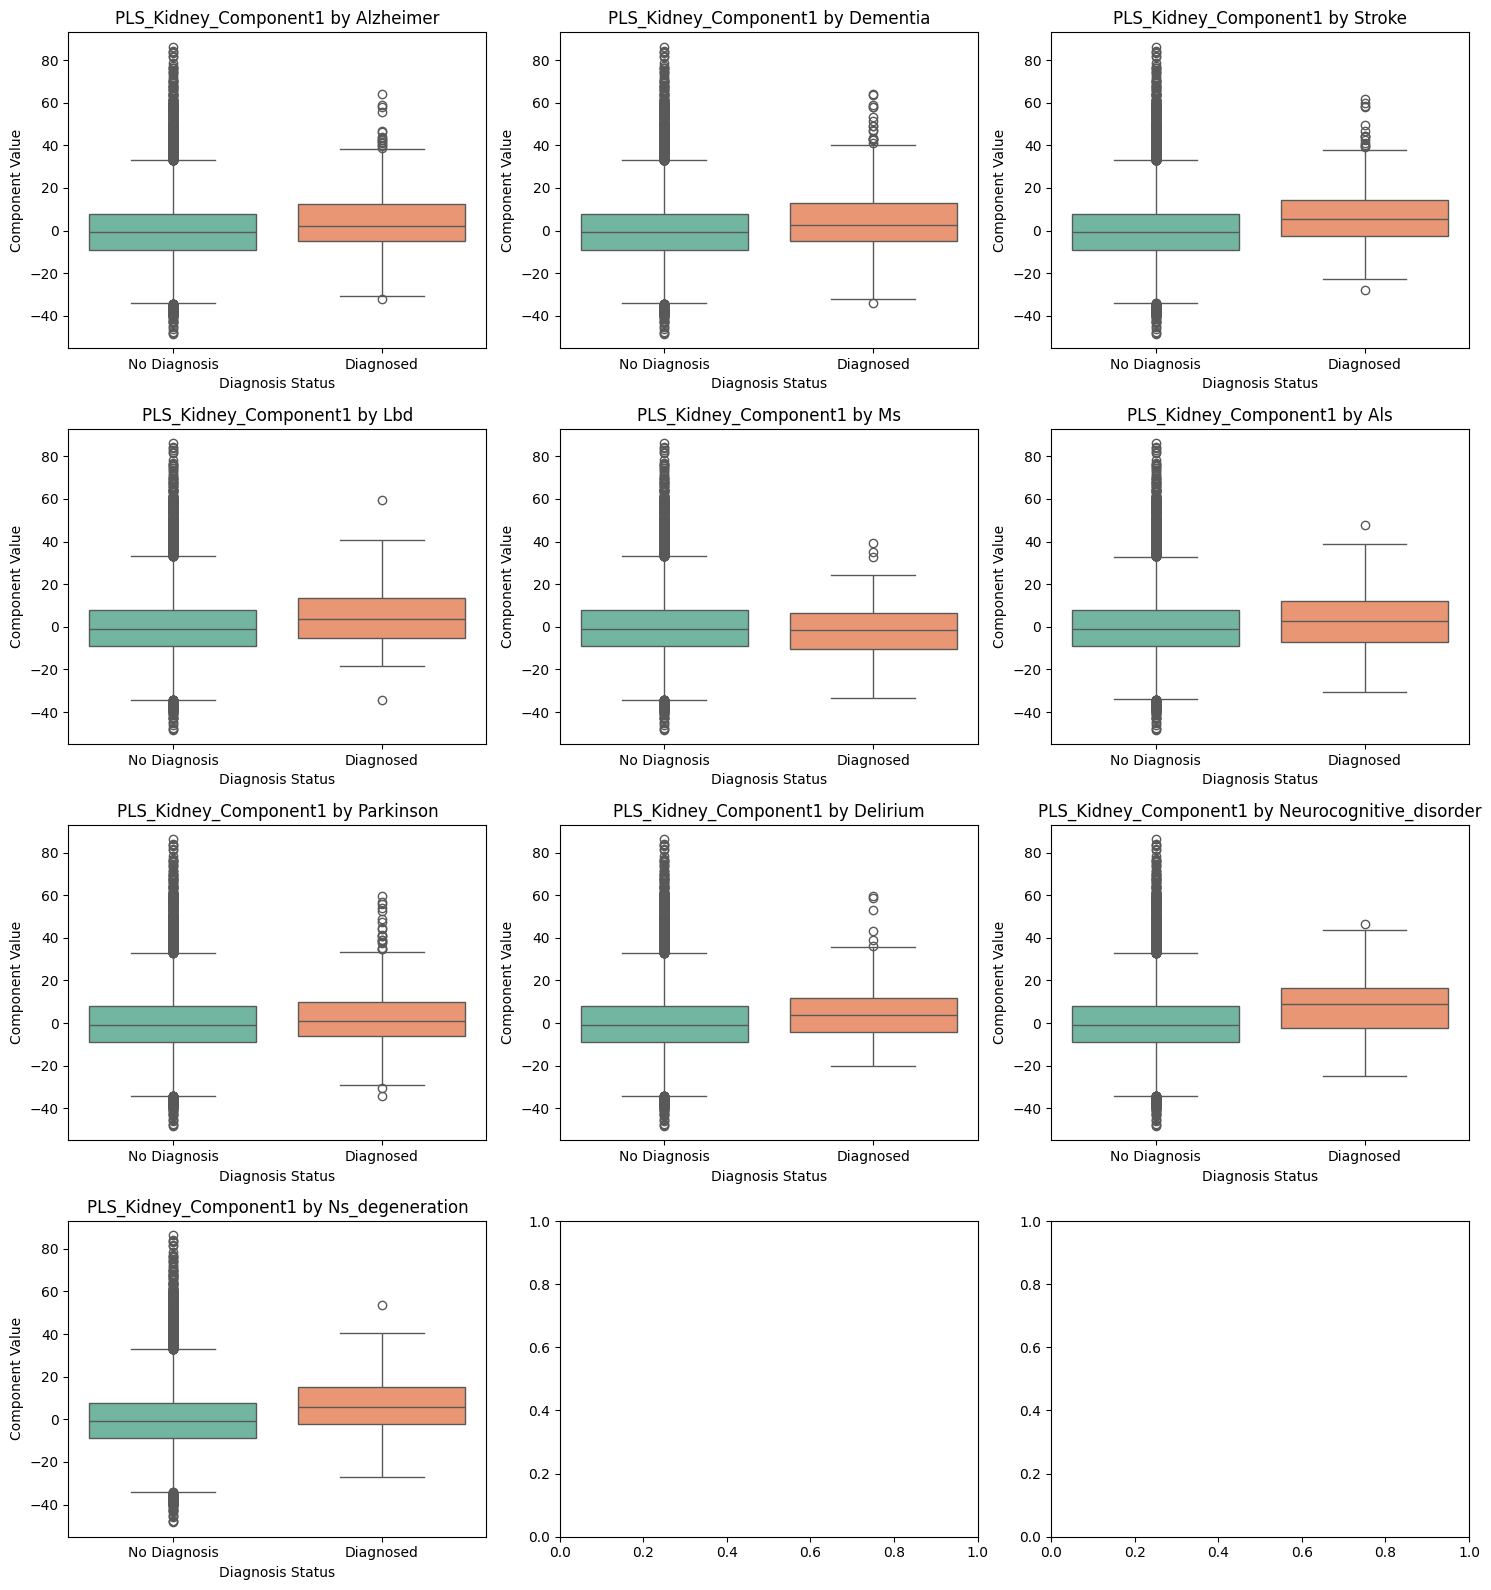

In [93]:
diseases = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", 
            "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

component_col = "PLS_Kidney_Component1"

n_cols = 3
n_rows = (len(diseases) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, disease in enumerate(diseases):
    ax = axes[i]
    
    plot_df = Kidney_pheno[[component_col, disease]].dropna().copy()
    plot_df[disease] = plot_df[disease].map({0: "No Diagnosis", 1: "Diagnosed"})
    
    sns.boxplot(
        x=disease, 
        y=component_col, 
        data=plot_df, 
        palette="Set2", 
        ax=ax,
        order=["No Diagnosis", "Diagnosed"]  # Forces consistent order
    )
    
    ax.set_title(f"{component_col} by {disease.capitalize()}")
    ax.set_xlabel("Diagnosis Status")
    ax.set_ylabel("Component Value")
plt.tight_layout()
plt.show()

In [95]:
Kidney_pheno = Kidney_final_df[ (Kidney_final_df["Kidney features"] == 1) & (Kidney_final_df["imaging"] == 1)].copy()
print("Number of participants with Kidney variables and imaging:", Kidney_pheno.shape[0])

Number of participants with Kidney variables and imaging: 4450


In [96]:
# Protein columns
protein_cols = Kidney_pheno.loc[:, "A1BG": "ZPR1"].columns
X_Kidney = Kidney_pheno[protein_cols]

In [97]:
start_col = "Albumin"
end_col = "Uric Acid"
Kidney_outcome_cols = Kidney_pheno.loc[:, start_col:end_col].columns

In [98]:
Y_Kidney = Kidney_pheno[Kidney_outcome_cols]

In [99]:
print("X shape:", X_Kidney.shape)
print("Y shape:", Y_Kidney.shape)

X shape: (4450, 2923)
Y shape: (4450, 8)


In [100]:
X_Kidney_clean = X_Kidney.dropna()
Y_Kidney_clean = Y_Kidney.loc[X_Kidney_clean.index].dropna()

X_Kidney_clean = X_Kidney_clean.loc[Y_Kidney_clean.index]
print("Clean X shape:", X_Kidney_clean.shape)
print("Clean Y shape:", Y_Kidney_clean.shape)

Clean X shape: (4450, 2923)
Clean Y shape: (4450, 8)


In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_Kidney_clean, Y_Kidney_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)

PLS Regression Test R² Score: 0.10762402997191454


In [102]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_Kidney_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(10)

print(protein_weights.loc[top_proteins.index])

CST3      0.085970
IGFBP6    0.084367
RELT      0.083230
CD38      0.081531
CD59      0.078037
HSPG2     0.072497
NPPC      0.068856
COL6A3    0.068345
IGFBP4    0.068105
PTGDS     0.066889
Name: PLS_Component_1_Weight, dtype: float64


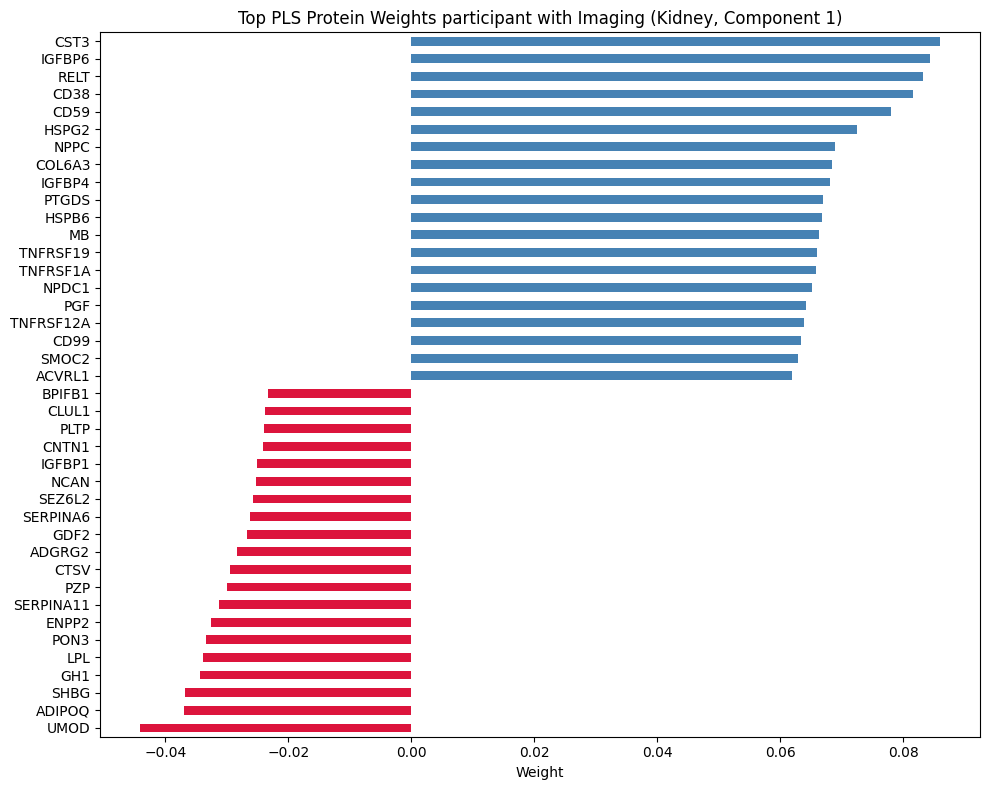

In [103]:
sorted_weights = protein_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights participant with Imaging (Kidney, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [104]:
# Extract weights
pheno_weights = pd.Series(
    pls_model.y_weights_.flatten(),
    index=Y_Kidney_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_pheno = pheno_weights.abs().sort_values(ascending=False).head(12)

# Display top 20 proteins (with their signed weights)
print(pheno_weights.loc[top_pheno.index])

Cystatin C       0.051405
Uric Acid        0.036661
Creatinine       0.032240
Urea             0.020312
Calcium          0.009743
Total Protein    0.007180
Phosphate       -0.001746
Albumin         -0.001278
Name: PLS_Component_1_Weight, dtype: float64


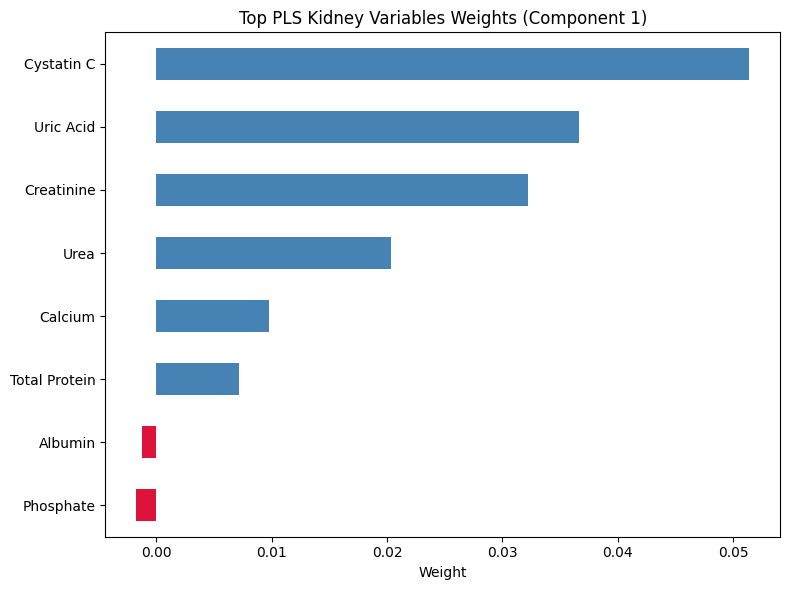

In [ ]:
sorted_weights = pheno_weights.sort_values()
#top_n = 12
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Kidney Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [106]:
# 1. Standardize protein data
X_standardized = (X_Kidney_clean - X_Kidney_clean.mean()) / X_Kidney_clean.std()
# 2. Run PCA and extract the first principal component
pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_standardized)
# 3. Regress out PC1 from each protein
X_residualized = pd.DataFrame(index=X_standardized.index, columns=X_standardized.columns)
for col in X_standardized.columns:
    model = LinearRegression()
    model.fit(pc1, X_standardized[col])
    predicted = model.predict(pc1)
    residual = X_standardized[col] - predicted
    X_residualized[col] = residual

# 4. the residualized protein data
X_residualized = X_residualized.astype(float)
print("Original X shape:", X_Kidney_clean.shape)
print("Residualized X shape:", X_residualized.shape)


Original X shape: (4450, 2923)
Residualized X shape: (4450, 2923)


In [107]:
# 1. Split the residualized data
X_train_resid, X_test_resid, Y_train_resid, Y_test_resid = train_test_split(
    X_residualized, Y_Kidney_clean, test_size=0.2, random_state=42
)

# 2. Define and fit the PLS model
pls_model_resid = PLSRegression(n_components=1)
pls_model_resid.fit(X_train_resid, Y_train_resid)

# 3. Predict on the test set
Y_pred_resid = pls_model_resid.predict(X_test_resid)

# 4. Evaluate performance
r2_resid = r2_score(Y_test_resid, Y_pred_resid)
r2_resid

0.12926370337373055

In [108]:
# 5. Extract top X weights (proteins)
protein_weights_resid = pd.Series(
    pls_model_resid.x_weights_.flatten(),
    index=X_residualized.columns,
    name="PLS_Component_1_Weight"
)
top_proteins_resid = protein_weights_resid.abs().sort_values(ascending=False).head(10)
top_protein_weights = protein_weights_resid.loc[top_proteins_resid.index]
top_protein_weights

CST3        0.085754
IGFBP6      0.085477
RELT        0.082499
CD38        0.079933
CD59        0.077816
HSPG2       0.072233
IGFBP4      0.068779
COL6A3      0.068583
TNFRSF1A    0.067196
HSPB6       0.067024
Name: PLS_Component_1_Weight, dtype: float64

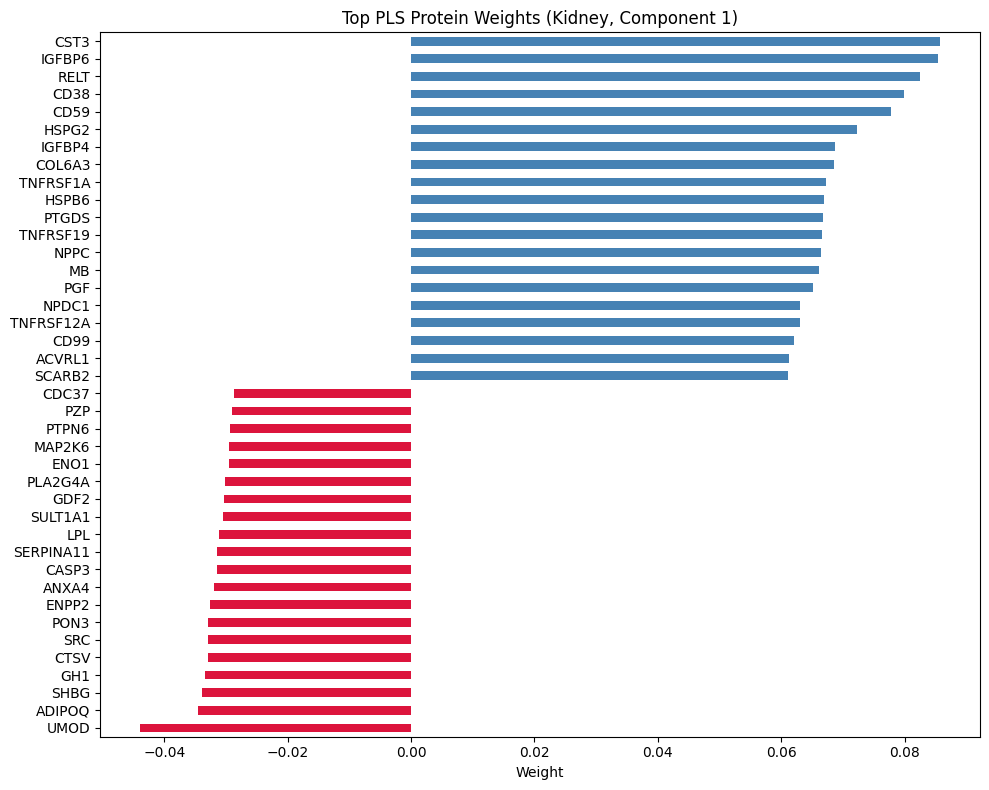

In [109]:
sorted_weights = protein_weights_resid.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Kidney, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [110]:
# 6. Extract top Y weights (phenotypes)
pheno_weights_resid = pd.Series(
    pls_model_resid.y_weights_.flatten(),
    index=Y_Kidney_clean.columns,
    name="PLS_Component_1_Weight"
)
top_pheno_resid = pheno_weights_resid.abs().sort_values(ascending=False).head(20)
top_pheno_weights = pheno_weights_resid.loc[top_pheno_resid.index]

top_pheno_weights

Cystatin C       0.062875
Uric Acid        0.041085
Creatinine       0.040991
Urea             0.026412
Albumin         -0.007145
Phosphate       -0.005593
Calcium          0.003709
Total Protein   -0.001582
Name: PLS_Component_1_Weight, dtype: float64

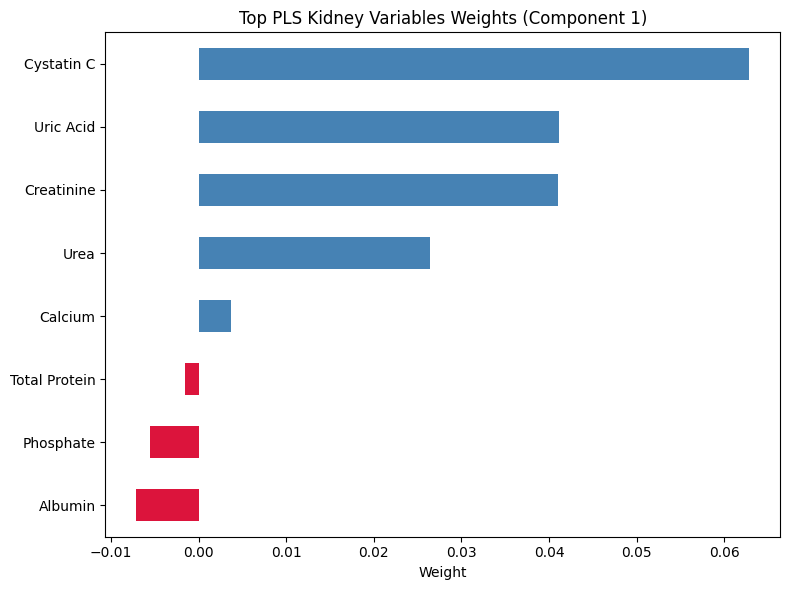

In [111]:
sorted_weights = pheno_weights_resid.sort_values()
# top_n = 20
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Kidney Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [112]:
pls_scores = pls_model.transform(X_Kidney_clean)

In [113]:
Kidney_pheno = Kidney_pheno.loc[X_Kidney_clean.index].copy() 
Kidney_pheno["PLS_Kidney_Component1"] = pls_scores[:, 0]

In [114]:
Kidney_region_cols = [col for col in Kidney_pheno.columns if "Mean_Thickness_" in col]

# Covariates to adjust for
covariates = ["Age_at_recruitment", "Sex"]

# Define which PLS component to analyze
pls_component_col = "PLS_Kidney_Component1"

# Initialize dictionaries to store results
t_values_Kidney_pls = {}
p_values_Kidney_pls = {}

# Perform OLS for each brain region
for Kidney_region in Kidney_region_cols:
    if Kidney_region not in Kidney_pheno.columns:
        continue

    X = Kidney_pheno[[pls_component_col] + covariates].copy()
    y = Kidney_pheno[Kidney_region].copy()

    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X, missing="drop").fit()

    t_values_Kidney_pls[Kidney_region] = model.tvalues[pls_component_col]
    p_values_Kidney_pls[Kidney_region] = model.pvalues[pls_component_col]

# Convert results to DataFrames
t_values_Kidney_pls_df = pd.DataFrame(t_values_Kidney_pls, index=[pls_component_col])
p_values_Kidney_pls_df = pd.DataFrame(p_values_Kidney_pls, index=[pls_component_col])

# Combine for export
t_values_Kidney_pls_df.columns = [f"T-Value_{col}" for col in t_values_Kidney_pls_df.columns]
p_values_Kidney_pls_df.columns = [f"P-Value_{col}" for col in p_values_Kidney_pls_df.columns]

Kidney_combined_results_pls = pd.concat([t_values_Kidney_pls_df, p_values_Kidney_pls_df], axis=1)

Kidney_combined_results_pls.to_csv("PLS_Component1_vs_Kidney_Thickness.csv")
Kidney_combined_results_pls

,T-Value_Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere,T-Value_Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere,T-Value_Mean_Thickness_Cuneus_Left_Hemisphere,T-Value_Mean_Thickness_Entorhinal_Left_Hemisphere,T-Value_Mean_Thickness_Fusiform_Left_Hemisphere,T-Value_Mean_Thickness_InferiorParietal_Left_Hemisphere,T-Value_Mean_Thickness_InferiorTemporal_Left_Hemisphere,T-Value_Mean_Thickness_IsthmusCingulate_Left_Hemisphere,T-Value_Mean_Thickness_LateralOccipital_Left_Hemisphere,T-Value_Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere,...,P-Value_Mean_Thickness_Precentral_Right_Hemisphere,P-Value_Mean_Thickness_Precuneus_Right_Hemisphere,P-Value_Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere,P-Value_Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorFrontal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorParietal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorTemporal_Right_Hemisphere,P-Value_Mean_Thickness_Supramarginal_Right_Hemisphere,P-Value_Mean_Thickness_TransverseTemporal_Right_Hemisphere,P-Value_Mean_Thickness_Insula_Right_Hemisphere
PLS_Kidney_Component1,-1.545638,-0.996141,2.559411,-3.481448,-0.908079,0.331815,-1.372724,0.306356,2.88105,-1.765988,...,0.179608,0.913221,0.606121,0.249821,0.530888,0.16282,0.024186,0.768305,0.366478,0.10181


In [115]:
# Mapping from your column names to ggseg Desikan-Killiany atlas names
cortical_mapping = {
    "T-Value_Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere": "caudalanteriorcingulate_left",
    "T-Value_Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere": "caudalmiddlefrontal_left",
    "T-Value_Mean_Thickness_Cuneus_Left_Hemisphere": "cuneus_left",
    "T-Value_Mean_Thickness_Entorhinal_Left_Hemisphere": "entorhinal_left",
    "T-Value_Mean_Thickness_Fusiform_Left_Hemisphere": "fusiform_left",
    "T-Value_Mean_Thickness_InferiorParietal_Left_Hemisphere": "inferiorparietal_left",
    "T-Value_Mean_Thickness_InferiorTemporal_Left_Hemisphere": "inferiortemporal_left",
    "T-Value_Mean_Thickness_IsthmusCingulate_Left_Hemisphere": "isthmuscingulate_left",
    "T-Value_Mean_Thickness_LateralOccipital_Left_Hemisphere": "lateraloccipital_left",
    "T-Value_Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere": "lateralorbitofrontal_left",
    "T-Value_Mean_Thickness_Lingual_Left_Hemisphere": "lingual_left",
    "T-Value_Mean_Thickness_MedialOrbitoFrontal_Left_Hemisphere": "medialorbitofrontal_left",
    "T-Value_Mean_Thickness_MiddleTemporal_Left_Hemisphere": "middletemporal_left",
    "T-Value_Mean_Thickness_Parahippocampal_Left_Hemisphere": "parahippocampal_left",
    "T-Value_Mean_Thickness_Paracentral_Left_Hemisphere": "paracentral_left",
    "T-Value_Mean_Thickness_ParsOpercularis_Left_Hemisphere": "parsopercularis_left",
    "T-Value_Mean_Thickness_ParsOrbitalis_Left_Hemisphere": "parsorbitalis_left",
    "T-Value_Mean_Thickness_ParsTriangularis_Left_Hemisphere": "parstriangularis_left",
    "T-Value_Mean_Thickness_Pericalcarine_Left_Hemisphere": "pericalcarine_left",
    "T-Value_Mean_Thickness_Postcentral_Left_Hemisphere": "postcentral_left",
    "T-Value_Mean_Thickness_PosteriorCingulate_Left_Hemisphere": "posteriorcingulate_left",
    "T-Value_Mean_Thickness_Precentral_Left_Hemisphere": "precentral_left",
    "T-Value_Mean_Thickness_Precuneus_Left_Hemisphere": "precuneus_left",
    "T-Value_Mean_Thickness_RostralAnteriorCingulate_Left_Hemisphere": "rostralanteriorcingulate_left",
    "T-Value_Mean_Thickness_RostralMiddleFrontal_Left_Hemisphere": "rostralmiddlefrontal_left",
    "T-Value_Mean_Thickness_SuperiorFrontal_Left_Hemisphere": "superiorfrontal_left",
    "T-Value_Mean_Thickness_SuperiorParietal_Left_Hemisphere": "superiorparietal_left",
    "T-Value_Mean_Thickness_SuperiorTemporal_Left_Hemisphere": "superiortemporal_left",
    "T-Value_Mean_Thickness_Supramarginal_Left_Hemisphere": "supramarginal_left",
    "T-Value_Mean_Thickness_TransverseTemporal_Left_Hemisphere": "transversetemporal_left",
    "T-Value_Mean_Thickness_Insula_Left_Hemisphere": "insula_left",
    
    "T-Value_Mean_Thickness_CaudalAnteriorCingulate_Right_Hemisphere": "caudalanteriorcingulate_right",
    "T-Value_Mean_Thickness_CaudalMiddleFrontal_Right_Hemisphere": "caudalmiddlefrontal_right",
    "T-Value_Mean_Thickness_Cuneus_Right_Hemisphere": "cuneus_right",
    "T-Value_Mean_Thickness_Entorhinal_Right_Hemisphere": "entorhinal_right",
    "T-Value_Mean_Thickness_Fusiform_Right_Hemisphere": "fusiform_right",
    "T-Value_Mean_Thickness_InferiorParietal_Right_Hemisphere": "inferiorparietal_right",
    "T-Value_Mean_Thickness_InferiorTemporal_Right_Hemisphere": "inferiortemporal_right",
    "T-Value_Mean_Thickness_IsthmusCingulate_Right_Hemisphere": "isthmuscingulate_right",
    "T-Value_Mean_Thickness_LateralOccipital_Right_Hemisphere": "lateraloccipital_right",
    "T-Value_Mean_Thickness_LateralOrbitoFrontal_Right_Hemisphere": "lateralorbitofrontal_right",
    "T-Value_Mean_Thickness_Lingual_Right_Hemisphere": "lingual_right",
    "T-Value_Mean_Thickness_MedialOrbitoFrontal_Right_Hemisphere": "medialorbitofrontal_right",
    "T-Value_Mean_Thickness_MiddleTemporal_Right_Hemisphere": "middletemporal_right",
    "T-Value_Mean_Thickness_Parahippocampal_Right_Hemisphere": "parahippocampal_right",
    "T-Value_Mean_Thickness_Paracentral_Right_Hemisphere": "paracentral_right",
    "T-Value_Mean_Thickness_ParsOpercularis_Right_Hemisphere": "parsopercularis_right",
    "T-Value_Mean_Thickness_ParsOrbitalis_Right_Hemisphere": "parsorbitalis_right",
    "T-Value_Mean_Thickness_ParsTriangularis_Right_Hemisphere": "parstriangularis_right",
    "T-Value_Mean_Thickness_Pericalcarine_Right_Hemisphere": "pericalcarine_right",
    "T-Value_Mean_Thickness_Postcentral_Right_Hemisphere": "postcentral_right",
    "T-Value_Mean_Thickness_PosteriorCingulate_Right_Hemisphere": "posteriorcingulate_right",
    "T-Value_Mean_Thickness_Precentral_Right_Hemisphere": "precentral_right",
    "T-Value_Mean_Thickness_Precuneus_Right_Hemisphere": "precuneus_right",
    "T-Value_Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere": "rostralanteriorcingulate_right",
    "T-Value_Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere": "rostralmiddlefrontal_right",
    "T-Value_Mean_Thickness_SuperiorFrontal_Right_Hemisphere": "superiorfrontal_right",
    "T-Value_Mean_Thickness_SuperiorParietal_Right_Hemisphere": "superiorparietal_right",
    "T-Value_Mean_Thickness_SuperiorTemporal_Right_Hemisphere": "superiortemporal_right",
    "T-Value_Mean_Thickness_Supramarginal_Right_Hemisphere": "supramarginal_right",
    "T-Value_Mean_Thickness_TransverseTemporal_Right_Hemisphere": "transversetemporal_right",
    "T-Value_Mean_Thickness_Insula_Right_Hemisphere": "insula_right",
}


Processing PLS_Kidney_Component1: Extracted 62 valid T-values


<Figure size 800x800 with 0 Axes>

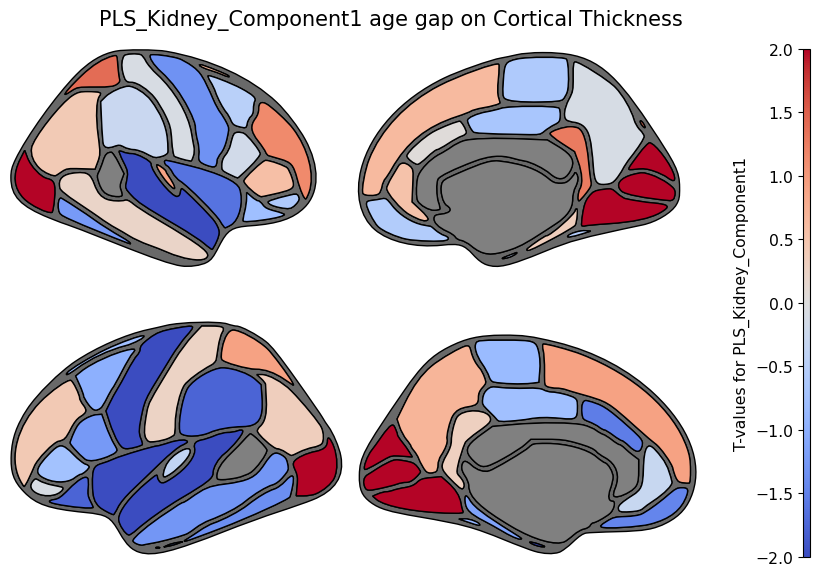

In [116]:
Kidney_region_columns = [col for col in t_values_Kidney_pls_df.columns if "Mean_Thickness_" in col]
for organ in t_values_Kidney_pls_df.index:
    
 
    t_values_Kidney_dict = {
        cortical_mapping[col]: t_values_Kidney_pls_df.loc[organ, col]
        for col in Kidney_region_columns if col in cortical_mapping  
    }

   
    t_values_Kidney_dict = {k: v for k, v in t_values_Kidney_dict.items() if not pd.isna(v)}

    if not t_values_Kidney_dict:
        continue

    
    print(f"Processing {organ}: Extracted {len(t_values_Kidney_dict)} valid T-values")

    import ggseg
    plt.figure(figsize=(8, 8))
    ggseg.plot_dk(
        t_values_Kidney_dict, cmap="coolwarm", figsize=(8, 8), background="white", 
        edgecolor="black", bordercolor="dimgray", ylabel=f"T-values for {organ}", 
        title=f"{organ} age gap on Cortical Thickness", vminmax=[-2, 2]
    )
    plt.show()

<Figure size 800x800 with 0 Axes>

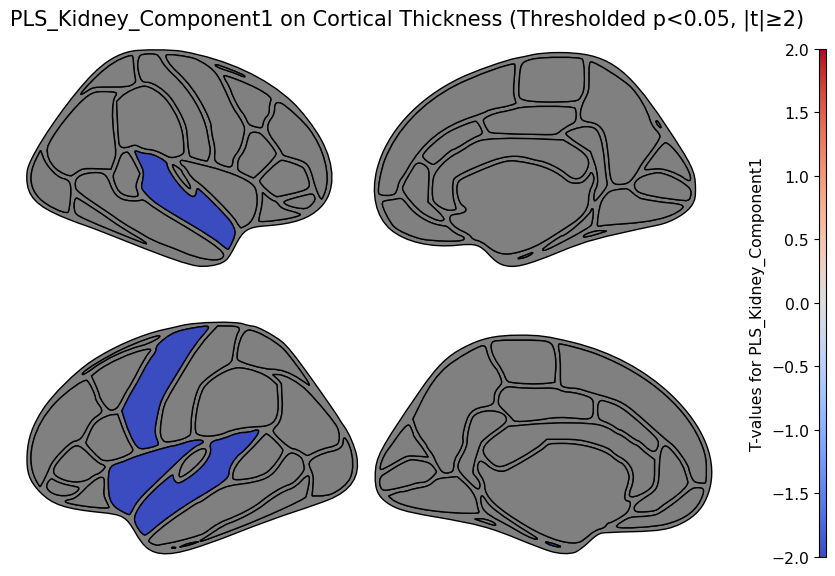

In [117]:
t_values_thresholded_Kidney_pls = t_values_Kidney_pls_df.copy()

for organ in t_values_Kidney_pls_df.index:
    for region in t_values_Kidney_pls_df.columns:
        p_value = t_values_Kidney_pls_df.loc[organ, region]  
        t_value = t_values_Kidney_pls_df.loc[organ, region] 

        
        if p_value >= 0.05 or abs(t_value) < 2:  
            t_values_thresholded_Kidney_pls.loc[organ, region] = 0 


for organ in t_values_thresholded_Kidney_pls.index:
    t_values_Kidney_dict = {
        cortical_mapping[col]: t_values_thresholded_Kidney_pls.loc[organ, col]
        for col in t_values_thresholded_Kidney_pls.columns if col in cortical_mapping
    }
    
   
    t_values_Kidney_dict = {k: v for k, v in t_values_Kidney_dict.items() if v != 0}

    
    if t_values_Kidney_dict:
        plt.figure(figsize=(8, 8))
        ggseg.plot_dk(
            t_values_Kidney_dict, cmap="coolwarm", figsize=(8, 8), background="white", 
            edgecolor="black", bordercolor="gray", ylabel=f"T-values for {organ}", 
            title=f"{organ} on Cortical Thickness (Thresholded p<0.05, |t|≥2)",
            vminmax=[-2, 2]
        )
        plt.show()